# Word2vec embedding model

In [78]:
import nltk
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings(action='ignore')

In [79]:
model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/Embedding Models/GoogleNews-vectors-negative300.bin',binary=True)

In [80]:
man=model['man']
man.shape

(300,)

In [81]:
model.most_similar(positive=['she','doctor'],negative=['he'])

[('nurse', 0.6588720679283142),
 ('gynecologist', 0.647172212600708),
 ('nurse_practitioner', 0.6255376935005188),
 ('midwife', 0.6002784371376038),
 ('pediatrician', 0.5921324491500854),
 ('dermatologist', 0.5582225322723389),
 ('ob_gyn', 0.5563921928405762),
 ('pharmacist', 0.5559877753257751),
 ('doctors', 0.5544067621231079),
 ('nurse_midwife', 0.554105281829834)]

In [82]:
model.similarity('nurse','he')

0.122331396

In [83]:
reference_vector = model['he']
words_to_compare = ['king', 'woman', 'queen', 'computer']
cosine_similarities = model.cosine_similarities(reference_vector,[model[word] for word in words_to_compare])
for word, similarity in zip(words_to_compare, cosine_similarities):
      print(f"Similarity between 'he' and '{word}': {similarity}")

Similarity between 'he' and 'king': 0.22512571513652802
Similarity between 'he' and 'woman': 0.27842947840690613
Similarity between 'he' and 'queen': 0.0928286537528038
Similarity between 'he' and 'computer': 0.06230514124035835


Plot of different occupations on the ~she-~he vector

In [84]:
she_vector = model['she']
he_vector = model['he']
reference_vector = she_vector-he_vector
# reference_vector=she_vector

In [85]:
occupations = ['doctor', 'nurse', 'engineer', 'teacher', 'scientist', 'artist', 'programmer', 'manager', 'chef', 'driver']

occupation_vectors = [model[word] for word in occupations]

In [86]:
cosine_similarities = model.cosine_similarities(reference_vector,occupation_vectors)

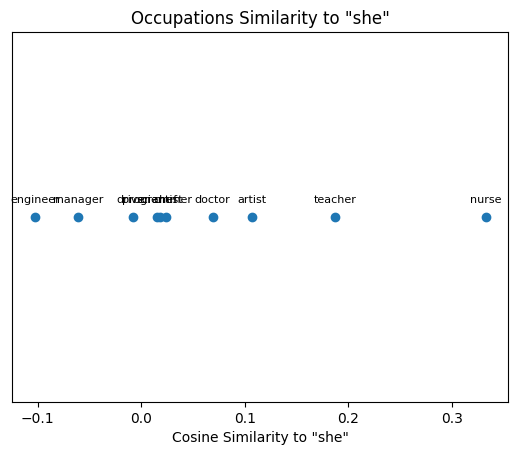

In [87]:
fig, ax = plt.subplots()
ax.scatter(cosine_similarities, np.zeros_like(cosine_similarities), marker='o')

# for i, occupation in enumerate(occupations):
#     ax.annotate(occupation, (occupation_vectors[i], 0), textcoords="offset points", xytext=(0,10), ha='center')

for i, occupation in enumerate(occupations):
    ax.annotate(occupation, (cosine_similarities[i], 0), textcoords="offset points", xytext=(0,10), ha='center',fontsize=8)

# Set labels and title
ax.set_xlabel('Cosine Similarity to "she"')
ax.set_yticks([])
ax.set_title('Occupations Similarity to "she"')

plt.show()


# Bert Embedding model

In [99]:
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity
import torch

In [111]:
words= ['he','she','king','queen']

In [112]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [113]:
tokens = tokenizer(words,return_tensors='pt',padding=True,truncation=True)

In [114]:
tokens

{'input_ids': tensor([[ 101, 2002,  102],
        [ 101, 2016,  102],
        [ 101, 2332,  102],
        [ 101, 3035,  102]]), 'token_type_ids': tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]])}

In [115]:
output = model(**tokens)

In [116]:
embeddings=output.last_hidden_state

In [117]:
embeddings.shape

torch.Size([4, 3, 768])

In [118]:
mean_embeddings = torch.mean(embeddings,dim=1)

In [119]:
mean_embeddings.shape

torch.Size([4, 768])

In [120]:
array_embedding = []
for i,word in enumerate(words):
  array_embedding.append(mean_embeddings[i].detach().numpy())

In [124]:
cosine_similarity([array_embedding[1]],[array_embedding[2]])

array([[0.8514766]], dtype=float32)